In [1]:
from regressor import ProjectionPursuitRegressor 
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d, Axes3D

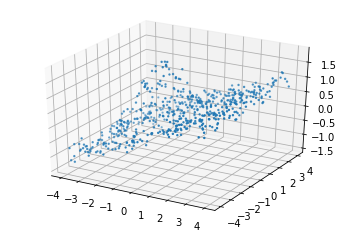

In [26]:
X = np.random.uniform(-4, 4, (600, 2))

def real_func(X) : 
    y = []
    mu1 = np.array([-1, 0])
    sigma1 = np.array([[1, 0], [0, 1]])
    
    # mu2 = np.array([0, 1])
    # sigma2 = np.array([[3, 0], [0, 0.5]])
    
    for i in range(len(X)) : 
        y.append(2*np.exp(-0.5*(X[i]-mu1).T@np.linalg.inv(sigma1)@(X[i]-mu1))+(X[i, 0]/4)+ np.random.normal(0, 0.2))
        
    return np.array(y)

y = real_func(X)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, s=2)
plt.show()

In [3]:
X.shape, y.shape

((100, 2), (100,))

In [53]:
def func_init(x):
    return x

w_init = np.random.normal(0, 2, X.shape[1])
w_init /= np.linalg.norm(w_init)

reg = ProjectionPursuitRegressor(func_init, w_init)
# reg.estimate_g(X, y, 1, 5)
# reg.estimate_w(X, y, 1)

X_test = np.random.uniform(-4, 4, (10000, 2))
y_test = real_func(X_test)

Error = reg.fit(X, y, 10, 20, 4, val_set=(X_test, y_test))

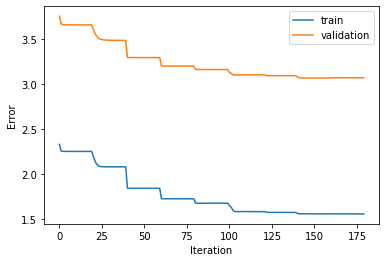

In [54]:
plt.plot(np.log(np.array(Error[0])), label='train')
plt.plot(np.log(np.array(Error[1])), label='validation')

plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.show()

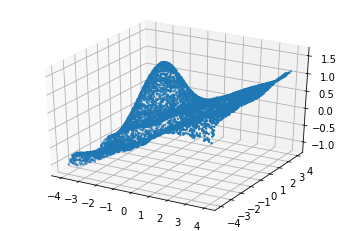

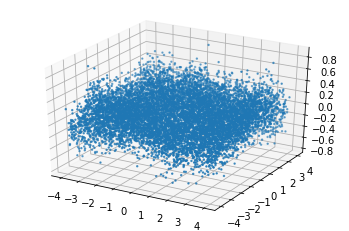

In [55]:
# X_test = np.random.uniform(-2, 2, (10000, 2))
y_pred = reg.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, s=2)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test-y_pred, s=2)
plt.show()

In [56]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=7)

RF.fit(X, y)
print('done')


done


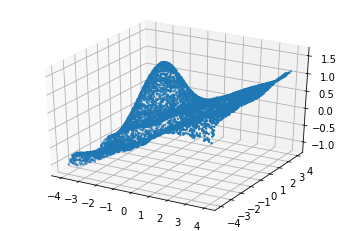

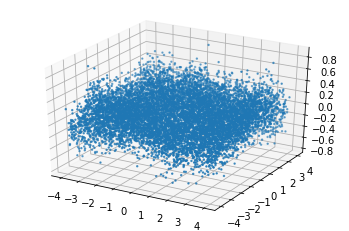

In [57]:
y_pred_rf = RF.predict(X_test)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, s=2)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test-y_pred, s=2)
plt.show()

In [58]:
from sklearn.metrics import r2_score, mean_squared_error


r2_score(y_test, y_pred), r2_score(y_test, y_pred_rf), mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_rf)

(0.8939528528920304,
 0.8682929715170693,
 0.04660596837717085,
 0.05788306212780053)

In [79]:
# Import necessary libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Load the Boston Housing dataset
boston = load_boston()
X = boston.data
y = boston.target

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [245]:
# Initialize and fit the linear regression model
w_init = np.random.normal(0, 2, X.shape[1])
w_init /= np.linalg.norm(w_init)

In [247]:
model_ppr = ProjectionPursuitRegressor(func_init, w_init)
error = model_ppr.fit(X_train, y_train, 10, 50, 4, val_set=(X_test, y_test))

# Make predictions on the test set
y_pred = model_ppr.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R2 Error: {r2}')

Mean Squared Error: 15.710609193533246
R2 Error: 0.7857657342021129


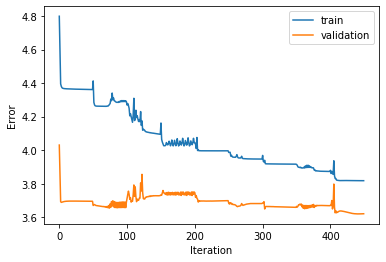

In [221]:
plt.plot(np.log(np.array(error[0])), label='train')
plt.plot(np.log(np.array(error[1])), label='validation')

plt.ylabel('Error')
plt.xlabel('Iteration')
plt.legend()
plt.show()

In [222]:

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test, y_pred)
print(f'R2 error : {r2}')

Mean Squared Error: 24.291119474973527
R2 error : 0.6687594935356318


In [225]:

# Initialize and fit the linear regression model
model = RandomForestRegressor(n_estimators=4, max_depth=3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


r2 = r2_score(y_test, y_pred)
print(f'R2 error : {r2}')

Mean Squared Error: 13.091872258756515
R2 error : 0.8214755642684498


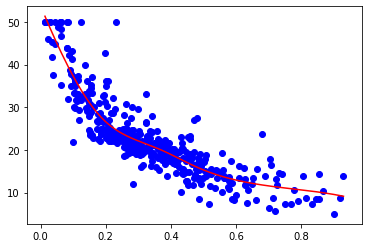

In [240]:
X_proj1 = X_train @ model_ppr.terms[1].w

A = np.argsort(X_proj1)
y_out1 = model_ppr.terms[1].output(X_train)

plt.scatter(X_proj1, y_train, c='b')
plt.plot(X_proj1[A], y_out1[A], c='r')
plt.show()

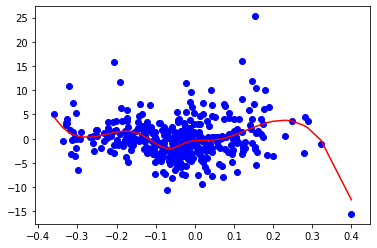

In [241]:
X_proj2 = X_train @ model_ppr.terms[2].w

A = np.argsort(X_proj2)
y_out2 = model_ppr.terms[2].output(X_train)

plt.scatter(X_proj2, y_train-y_out1, c='b')
plt.plot(X_proj2[A], y_out2[A], c='r')
plt.show()

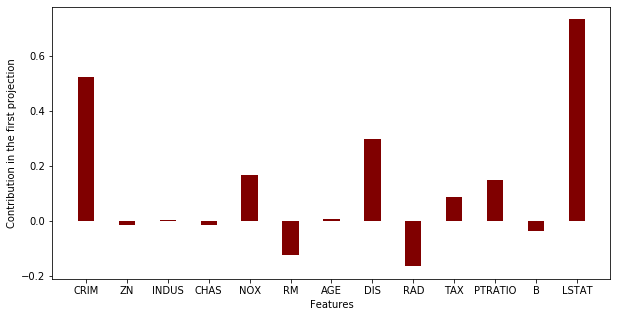

In [242]:

fig = plt.figure(figsize = (10, 5))
plt.bar(boston.feature_names, model_ppr.terms[1].w, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Features")
plt.ylabel("Contribution in the first projection")
# plt.title("Students enrolled in different courses")
plt.show()

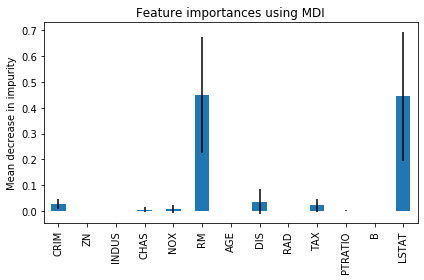

In [243]:
import pandas as pd

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=boston.feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()